Hesti Ariyani 
HestiPratiwi999@gmail.com

In [5]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-04-16 15:39:55--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  5.60MB/s    in 51s     

2021-04-16 15:40:47 (6.00 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [6]:
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [7]:
base_dir = '/tmp/rockpaperscissors/rps-cv-images'
train_dir = base_dir
validation_dir = base_dir

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
     rescale=1./255,
     rotation_range=20,
     horizontal_flip=True,
     shear_range = 0.2,
     validation_split = 0.4,
     fill_mode = 'wrap')

test_datagen = ImageDataGenerator(
     rescale=1./255,
     rotation_range=20,
     horizontal_flip=True,
     shear_range = 0.2,
     validation_split = 0.4,
     fill_mode = 'wrap')

In [9]:
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(100, 150),  
        batch_size=32,
        subset='training',
        class_mode='categorical')

validation_generator = train_datagen.flow_from_directory(
        validation_dir,  
        target_size=(100, 150), 
        batch_size=32,
        subset='validation',
        class_mode='categorical')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [16]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [44]:
from tensorflow.keras.optimizers import Adam, RMSprop

model.compile(optimizer = 'RMSprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [45]:
accuracy_threshold = 98e-2
class my_callbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = None):
        if logs.get('accuracy') >= accuracy_threshold:
            print('\nFor Epoch', epoch, '\nAccuracy has reach = %2.2f%%' %(logs['accuracy']*100), 'training has been stopped.')
            self.model.stop_training = True

In [46]:
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose = 2,
    callbacks = [my_callbacks()]
)

Epoch 1/20
25/25 - 16s - loss: 0.2508 - accuracy: 0.9416 - val_loss: 0.0707 - val_accuracy: 0.9688
Epoch 2/20
25/25 - 15s - loss: 0.2784 - accuracy: 0.9584 - val_loss: 0.1795 - val_accuracy: 0.9563
Epoch 3/20
25/25 - 15s - loss: 0.1066 - accuracy: 0.9623 - val_loss: 0.1685 - val_accuracy: 0.9625
Epoch 4/20
25/25 - 15s - loss: 0.0939 - accuracy: 0.9727 - val_loss: 0.0776 - val_accuracy: 0.9625
Epoch 5/20
25/25 - 14s - loss: 0.0836 - accuracy: 0.9688 - val_loss: 0.1077 - val_accuracy: 0.9750
Epoch 6/20
25/25 - 15s - loss: 0.0490 - accuracy: 0.9837 - val_loss: 0.0245 - val_accuracy: 0.9937

For Epoch 5 
Accuracy has reach = 98.37% training has been stopped.


Saving depositphotos_201891706-stock-video-playing-rock-paper-scissors-close.jpg to depositphotos_201891706-stock-video-playing-rock-paper-scissors-close (4).jpg
depositphotos_201891706-stock-video-playing-rock-paper-scissors-close.jpg
paper


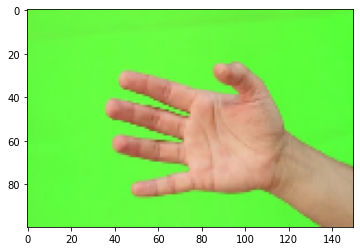

In [52]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissors')